In [19]:
import preprocessing.preprocessing as pp
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rokra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rokra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rokra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df = pp.load_data("english_cleaned_lyrics.csv")
df = pp.preprocess_data(df)
df = pp.adjust_genre_distribution(df)
df = df[['lyrics', 'genre']]
df

,lyrics,genre
0,oh baby know im gonna cut right chase woman ma...,Pop
1,playin everything easy like seem sure still wa...,Pop
2,search tenderness isnt hard find love need liv...,Pop
3,oh oh oh oh oh oh wrote book stand title book ...,Pop
4,party people people party popping sitting arou...,Pop
...,...,...
218205,gotta say boy couple date youre hand outright ...,Country/Folk
218206,helped find diamond ring made try everything t...,Country/Folk
218207,look couple corner booth look lot like shes lo...,Country/Folk
218208,fly mortal earth im measured depth girth fathe...,Country/Folk


In [13]:
X = df['lyrics'].to_list()
y = df['genre'].to_list()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [24]:
model = make_pipeline(
    CountVectorizer(tokenizer=word_tokenize, ngram_range=(1,3), token_pattern=None),
    LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear', penalty='l1', C=1,max_iter=200)
)

model.fit(X_train, y_train)
train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
print("Mean cross-validation score (training):", train_scores.mean())

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_score = f1_score(y_test, y_pred, average='macro')
print("F1 score on test set:", test_score)

Mean cross-validation score (training): 0.5408438931316185
F1 score on test set: 0.5562079946161606


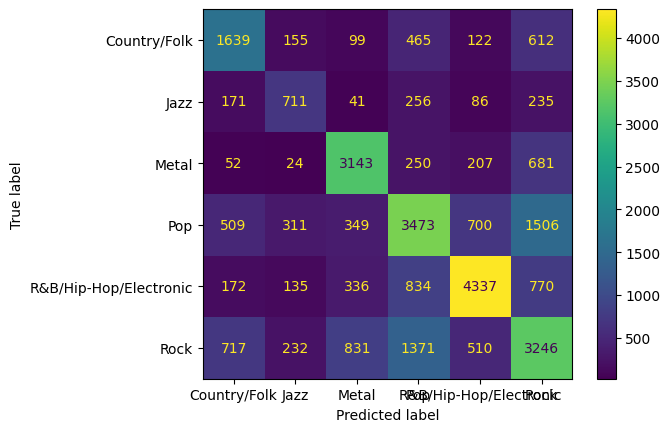

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

In [22]:
model = make_pipeline(
    CountVectorizer(tokenizer=word_tokenize, token_pattern=None),
    LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear', penalty='l1', C=1, max_iter=200)
)

# Define the parameter grid focusing only on n-gram ranges
param_grid = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]
}

# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', verbose=1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
test_score = f1_score(y_test, y_pred, average='macro')
print("F1 score on test set:", test_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\rokra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'countvectorizer__ngram_range': (1, 3)}
Best cross-validation score: 0.541
F1 score on test set: 0.5562079946161606
